In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('loan.csv')

In [4]:
df.Gender = df.Gender.fillna(df.Gender.mode)
x = df.Gender
x = np.array(x)
l1 = []
for i in x:
  if i == 'Male':
    l1.append(1)
  else:
    l1.append(0)
l1=np.array(l1)
df.Gender = l1

df.Married = df.Married.fillna(df.Married.mode)
x1 = np.array(df.Married)
l2 = []
for i in x1:
  if i == 'Yes':
    l2.append(1)
  else:
    l2.append(0)
l2 = np.array(l2)
df.Married = l2

df.Dependents = df.Dependents.fillna(df.Dependents.mode)
x1 = np.array(df.Dependents)
l2 = []
for i in x1:
  if i == '3+':
    l2.append(3)
  elif i == '0':
    l2.append(0)
  elif i == '1':
    l2.append(1)
  else:
    l2.append(2)
l2 = np.array(l2)
df.Dependents = l2

x1 = np.array(df.Education)
l2 = []
for i in x1:
  if i == 'Graduate':
    l2.append(1)
  else:
    l2.append(0)
l2 = np.array(l2)
df.Education = l2

df.Self_Employed = df.Self_Employed.fillna(df.Self_Employed.mode)
x1 = np.array(df.Self_Employed)
l2 = []
for i in x1:
  if i == 'Yes':
    l2.append(1)
  else:
    l2.append(0)
l2 = np.array(l2)
df.Self_Employed = l2

In [5]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())

df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean())

df.Credit_History = df.Credit_History.fillna(1)

x1 = np.array(df.Property_Area)
l2 = []
for i in x1:
  if i == 'Rural':
    l2.append(0)
  elif i == 'Semiurban':
    l2.append(1)
  else:
    l2.append(2)
l2 = np.array(l2)
df.Property_Area = l2

x1 = np.array(df.Loan_Status)
l2 = []
for i in x1:
  if i == 'Y':
    l2.append(1)
  else:
    l2.append(0)
l2 = np.array(l2)
df.Loan_Status = l2

In [6]:
df=df.drop(columns='Loan_ID',axis=1)

df_encoded = pd.concat([df, pd.get_dummies(df['Property_Area'], drop_first=True, prefix='Area')], axis=1)
df_encoded = df_encoded.drop(columns='Property_Area',axis=1)

df_encoded = df_encoded.drop(columns='Loan_Status',axis=1)

df_encoded = pd.concat([df_encoded, pd.get_dummies(df['Dependents'], drop_first=True, prefix='Dept')], axis=1)
df_encoded = df_encoded.drop(columns='Dependents',axis=1)

In [7]:
df_encoded.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Area_1,Area_2,Dept_1,Dept_2,Dept_3
0,1,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1,0,0,0
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,1,0,0
2,1,1,1,1,3000,0.0,66.000000,360.0,1.0,0,1,0,0,0
3,1,1,0,0,2583,2358.0,120.000000,360.0,1.0,0,1,0,0,0
4,1,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1,0,0,0


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_encoded,df['Loan_Status'],test_size=0.2,random_state = 3)

In [14]:
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

y_pred = rf_clf.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

grid_param = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': range(1,300,10),
    'max_depth' : range(1,100,1),
    'min_samples_leaf' : range(1,10,1),
    
}   
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
clf = RandomForestClassifier()
grid_search = RandomizedSearchCV(estimator=clf,param_distributions=grid_param)
grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

Train F1 Score  1.0
Train Accuracy  1.0
Validation Mean F1 Score:  0.698057185977837
Validation Mean Accuracy:  0.7678210678210677
Test Accuracy:  0.8373983739837398
Test F1 Score:  0.9
Confusion Matrix on Test Data
{'n_estimators': 191, 'min_samples_leaf': 8, 'max_depth': 50, 'criterion': 'gini'}


0.8617886178861789
AxesSubplot(0.125,0.125;0.62x0.755)
0.8617886178861789


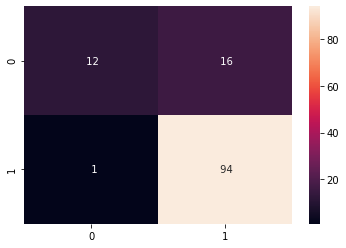

In [16]:
clf = RandomForestClassifier(criterion= 'gini', max_depth= 50, min_samples_leaf=8, n_estimators=191)
clf.fit(X_train,y_train)

y_test_pred = clf.predict(X_test)

print(accuracy_score(y_test,y_test_pred))

from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_test, y_test_pred)

print(sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='3.0f'))

TP = conf[1][1]
FN = conf[1][0]
TN = conf[0][0]
FP = conf[0][1]
print((TP + TN) / (TP + FP + FN + TN))

In [17]:
pickle.dump(clf,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [25]:
l = [1,0,1,0,5849,0,146, 360,1,0 ,1 ,0 ,0 ,0 ]
arr = np.array(l)
arr = arr.reshape(1,-1)
x = clf.predict(arr)
print(x)

[1]
